In [6]:
import pandas as pd

# Graph
import community
import networkx as nx

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Combinations
import itertools

import time
start_time = time.time()


In [7]:
G = nx.Graph()
fpath = "./dataset/facebook/"
egos = ['0','107','348','414','686','698','1684','1912','3437','3980']
node2Circle = {}
circle2Node = {}
#nodesPerCircle = [(1,)]

In [8]:
for ego in egos:
    e = int(ego)
    nodeLst = []
    node2Circle[e] = e
    
    edgeFile = fpath + ego +'.edges'
    f = open(edgeFile,'r')
    for line in f:
        m = line.split()
        fn = int(m[0])
        tn = int(m[1])
        G.add_edge(fn,tn)
    f.close()
    
    nodeFile = fpath + ego +'.feat'
    f = open(nodeFile,'r')
    for line in f:
        nodeLst.append(int(line.split()[0]))
    for n in nodeLst:
        node2Circle[n]=e
        if e==n: pass
        G.add_edge(e,n)
    f.close()

In [9]:
###  modularity
mod = community.modularity(node2Circle,G)

#  compute the best partition by Louvain Algorithm
partition = community.best_partition(G)

#  modularity
mod2 = community.modularity(partition,G)
print("modularity of community.best_partition: ",mod2)

modularity of community.best_partition:  0.8349114471268504


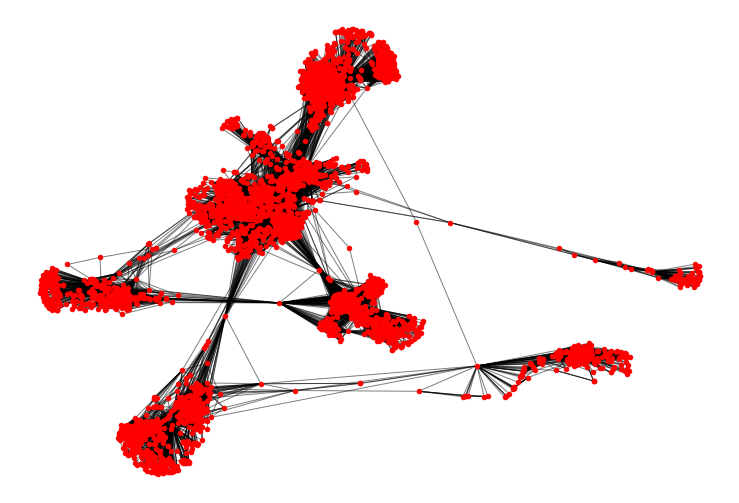

In [10]:
# Draw graph
plt.figure(figsize=(13, 9))
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0
for com in set(partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = 'r')
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.show()

In [11]:
# Keep only communities with a minimum of authors
centers = {}
communities = {}
G_main_com = G.copy()
min_nb = 30
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    if len(list_nodes) < min_nb:
        G_main_com.remove_nodes_from(list_nodes)
    else:
        # Get center
        H = G_main_com.subgraph(list_nodes)
        d_c = nx.degree_centrality(H)
        center = max(d_c, key=d_c.get)
        centers[center] = com
        communities[com] = center
        # Print community
        
        #print('Community of ', center , '(ID ', com, ') - ', len(list_nodes), ' users:')
        #print(list_nodes, '\n')


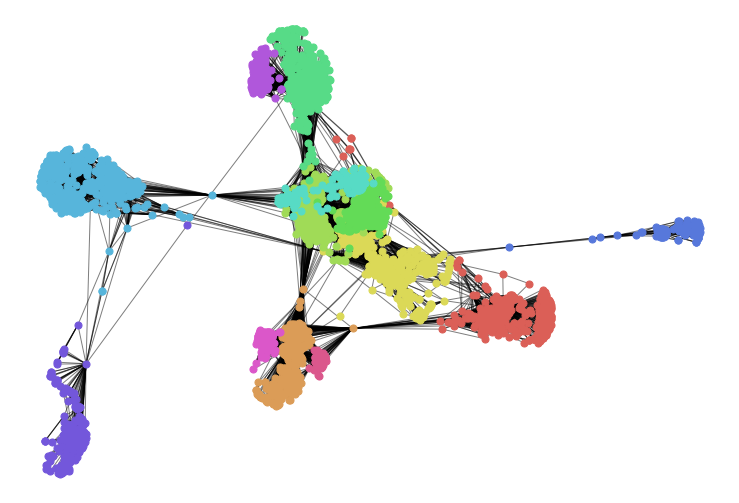

--- 125.11549925804138 seconds ---


In [12]:

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
# Display graph
plt.figure(figsize=(13, 9))
node_size = 50
count = 0
pos = nx.spring_layout(G_main_com)
colors = dict(zip(communities.keys(), sns.color_palette('hls', len(communities.keys()))))

for com in communities.keys():
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com and nodes not in communities.values()]
    nx.draw_networkx_nodes(G_main_com, pos, list_nodes, node_size = node_size, node_color = colors[com])
    nx.draw_networkx_nodes(G_main_com, pos, list([communities[com]]), node_size = node_size*5, node_color = colors[com])
nx.draw_networkx_edges(G_main_com, pos, alpha=0.5)
plt.axis('off')
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

In [10]:
# Display induced graph
nodes_main_com = {k: v for k, v in partition.items() if v in communities}
ind = community.induced_graph(nodes_main_com, G_main_com)
print('Number of communities', len(ind.nodes()))
print('\nMain communities and their center node:', communities)

Number of communities 13

Main communities and their center node: {0: 0, 1: 1912, 2: 348, 3: 107, 4: 896, 5: 1687, 6: 1684, 7: 3437, 9: 3980, 10: 686, 11: 2839, 13: 2266, 14: 2364}


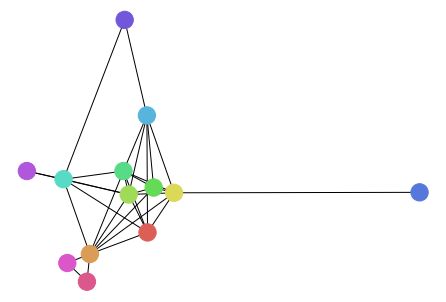

In [12]:
# Display induced graph
pos_ind = nx.spring_layout(ind)
nx.draw(ind, pos_ind, node_list=list(colors.keys()), node_color=list(colors.values()))
plt.show()